In [1]:

import umap

import scanpy as sc
import anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import adjusted_rand_score as ARI
from sklearn.metrics import adjusted_mutual_info_score as AMI

from scipy import sparse
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42 # enables correct plotting of text
rcParams['figure.figsize'] = (12,12)
import seaborn as sns
from scipy import sparse

sc.settings.verbosity =0


import harmonypy as hm
import matplotlib.pyplot as plt
import pandas as pd
import scanpy as sc


In [2]:
l1_colors = {
'ATL': '#1f77b4',
  'PT_VCAM1': '#c5b0d5',
 'CNT': '#ff7f0e',
 'DCT': '#279e68',
  'DCT1': '#279e68',
 'DCT2': '#ffb500',
 'DTL': '#d62728',
 'EC': '#aa40fc',
 'ENDO': '#aa40fc',
 'FIB': '#8c564b',
 'IC': '#e377c2',
 'ICA': '#e377c2',
 'ICB': '#7b4f4b',
 'IMM': '#b5bd61',
 'LEUK': '#b5bd61',
 'NEU': '#17becf',
 'PC': '#aec7e8',
 'PEC': '#17becf',
 'POD': '#98df8a',
 'PODO': '#98df8a',
'PT': '#ff9896',
 'PapE': '#c5b0d5',
 'TAL': '#c49c94',
'MES': '#f7b6d2',
 'VSM/P': '#f7b6d2','Unclassified':'#d3d3d3'}

In [3]:
l3_colors = {
'ATL': '#ffff00',
 'B': '#1ce6ff',
 'C-TAL': '#ff34ff',
 'PC': '#aec7e8',
 'CCD-IC-A': '#ff4a46',
 'CCD-PC': '#008941',
 'CNT': '#006fa6',
 'CNT-IC-A': '#a30059',
 'CNT-PC': '#ffdbe5',
 'DCT1': '#7a4900',
 'DCT2': '#0000a6',
 'DTL': '#63ffac',
 'EC-AEA': '#b79762',
 'EC-AVR': '#004d43',
 'EC-DVR': '#8fb0ff',
 'EC-GC': '#997d87',
 'EC-LYM': '#5a0007',
 'EC-PTC': '#809693',
 'FIB': '#6a3a4c',
 'IC-B': '#1b4400',
 'IMCD': '#4fc601',
 'M-FIB': '#3b5dff',
 'M-TAL': '#4a3b53',
 'MAC-M2': '#ff2f80',
 'MAST': '#61615a',
 'MC': '#ba0900',
 'MD': '#6b7900',
 'MDC': '#00c2a0',
 'MYOF': '#ffaa92',
 'N': '#ff90c9',
 'NEU': '#b903aa',
 'NKC/T': '#d16100',
 'OMCD-IC-A': '#ddefff',
 'OMCD-PC': '#000035',
 'PEC': '#7b4f4b',
 'PL': '#a1c299',
 'POD': '#300018',
 'PT-S1/2': '#0aa6d8',
 'PT-S3': '#013349',
 'PapE': '#00846f',
 'REN': '#372101',
 'T': '#ffb500',
 'VSMC': '#c2ffed',
 'VSMC/P': '#a079bf',
 'aFIB': '#cc0744',
 'aPT': '#c0b9b2',
 'aTAL1': '#c2ff99',
 'aTAL2': '#001e09',
 'cDC': '#00489c',
 'cycCNT': '#6f0062',
 'cycDCT': '#0cbd66',
 'cycEC': '#eec3ff',
 'cycMNP': '#456d75',
 'cycMYOF': '#b77b68',
 'cycNKC/T': '#7a87a1',
 'cycPT': '#788d66',
 'dC-IC-A': '#885578',
 'dC-TAL': '#fad09f',
 'dCNT': '#ff8a9a',
 'dDCT': '#d157a0',
 'dEC': '#bec459',
 'dEC-PTC': '#456648',
 'dFIB': '#0086ed',
 'dIMCD': '#886f4c',
 'dM-FIB': '#34362d',
 'dM-TAL': '#b4a8bd',
 'dOMCD-PC': '#00a6aa',
 'dPT': '#452c2c',
 'dVSMC': '#636375',
 'ncMON': '#a3c8c9',
 'pDC': '#ff913f',
 'tPC-IC': '#938a81','Unclassified':'#d3d3d3'}

# RNA- INTEGRATION // ISOLATION OF FIB and VSMC

In [ ]:
adata = sc.read('objects/RNA_STWG_final.h5ad')
adata

AnnData object with n_obs × n_vars = 97125 × 38224
    obs: 'sample', 'batch', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'Deepscore_external', 'Doublet_Detection_doublets_scRNA', 'Doublet_Detection_doublets_score_scRNA', 'Doublet_Detection_doublets_scRNA5p', 'Doublet_Detection_doublets_score_scRNA5p', 'AMULET_doublets', 'AMULET_pval', 'AMULET_qval', 'Doublet_Detection_doublets_snRNA', 'Doublet_Detection_doublets_score_snRNA', 'In_final_obj', 'Deepscore', 'Technology', 'Suspension_type', 'Study', 'Donor_id', 'Deepscore_HCA_l1_Clean', 'Deepscore_HCA_l1_full', 'Deepscore_HCA_l1_Clean_score', 'Deepscore_HCA_l1_Full', 'Deepscore_HCA_l1_Full_score', 'Deepscore_HCA_l3_Clean', 'Deepscore_HCA_l3_Clean_score', 'Deepscore_HCA_l3_Full', 'Deepscore_HCA_l3_Full_score', 'Deepscore_Muto', 'Deepscore_Muto_score', 'leiden_scVI_0.3', 'leiden_scVI_1.4', 'leiden_scVI_2', 'leiden_scVI_6', 'leiden_scVI_10', 'Manual_Annotation_l1',

In [20]:
adata = adata[adata.obs['Manual_Annotation_l1'].isin(['FIB','VSM/P'])].copy()


Figure size= (14, 14) dpi= 100.0 Scale factor = 66.72875413799996


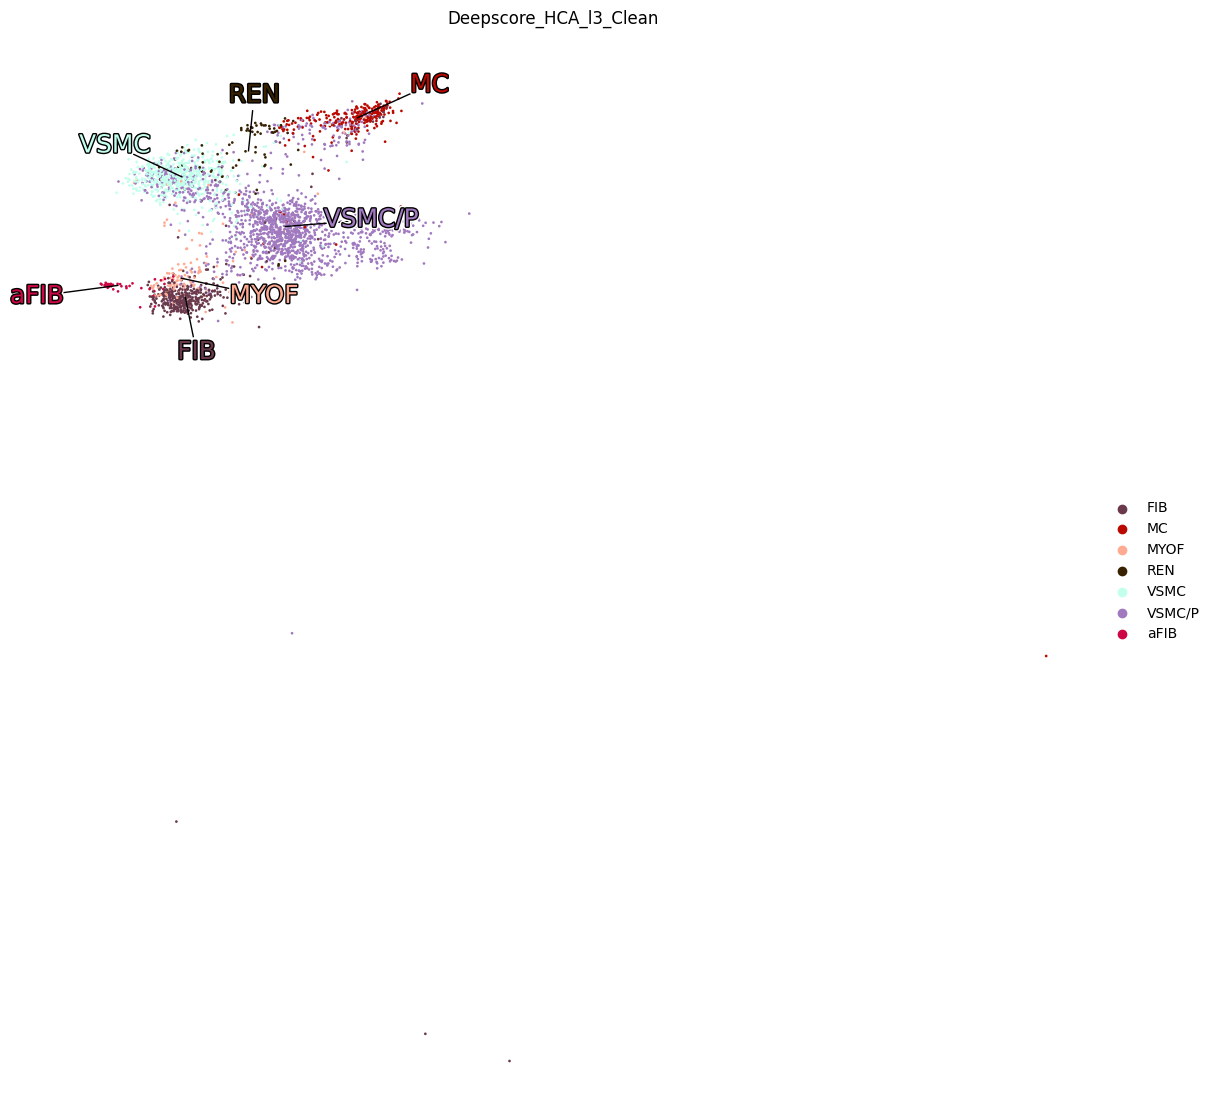

In [22]:
for ann in ['Deepscore_HCA_l3_Clean']:
    adata.uns[f'{ann}_colors'] = [l3_colors[i] for i in adata.obs[ann].cat.categories]
    umap_refined(adata,
                umap = 'Umap_scVI',
                var = ann,
                size= 15,
                label_size = 10 * (50/len(adata.obs[ann].unique())),
                width_in_inches = 14,
                height_in_inches = 14,
                max_iterations=7)
    # plt.savefig(f'../DEEPSCORE/figures/umaps/{ann}.png',  bbox_inches='tight', dpi=300)
    plt.savefig(f'figures/NORN/scVI_{ann}.png',  bbox_inches='tight', dpi=300)

In [33]:
adata.raw=None

In [23]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

In [24]:
sc.tl.score_genes(adata, ['DCN','PDGFRA','GSN','TIMP1','CFD'], score_name='Norm Score', use_raw=False)


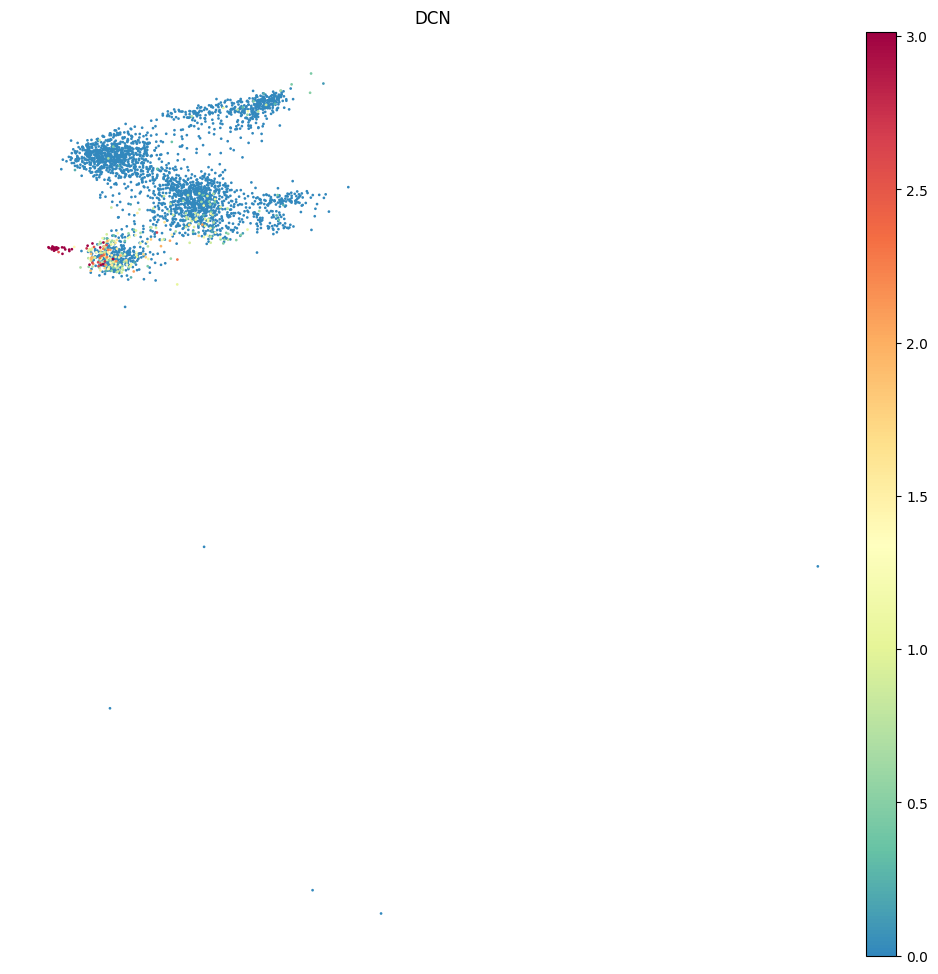

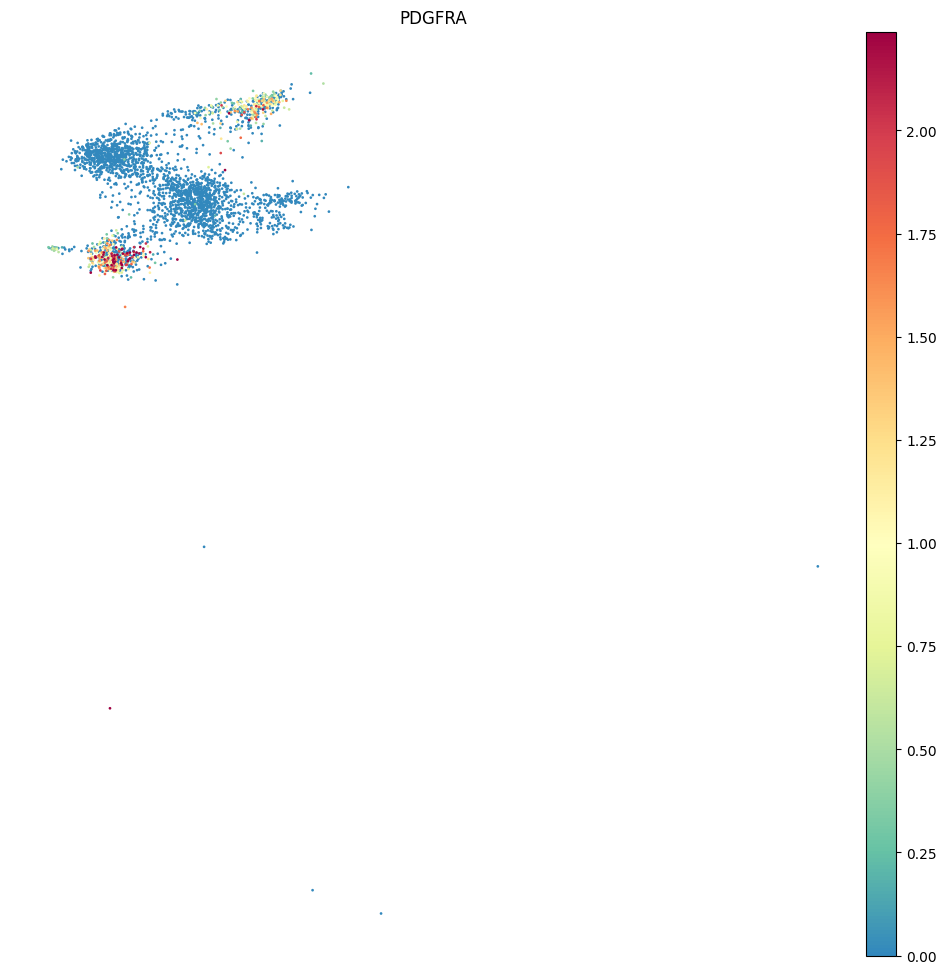

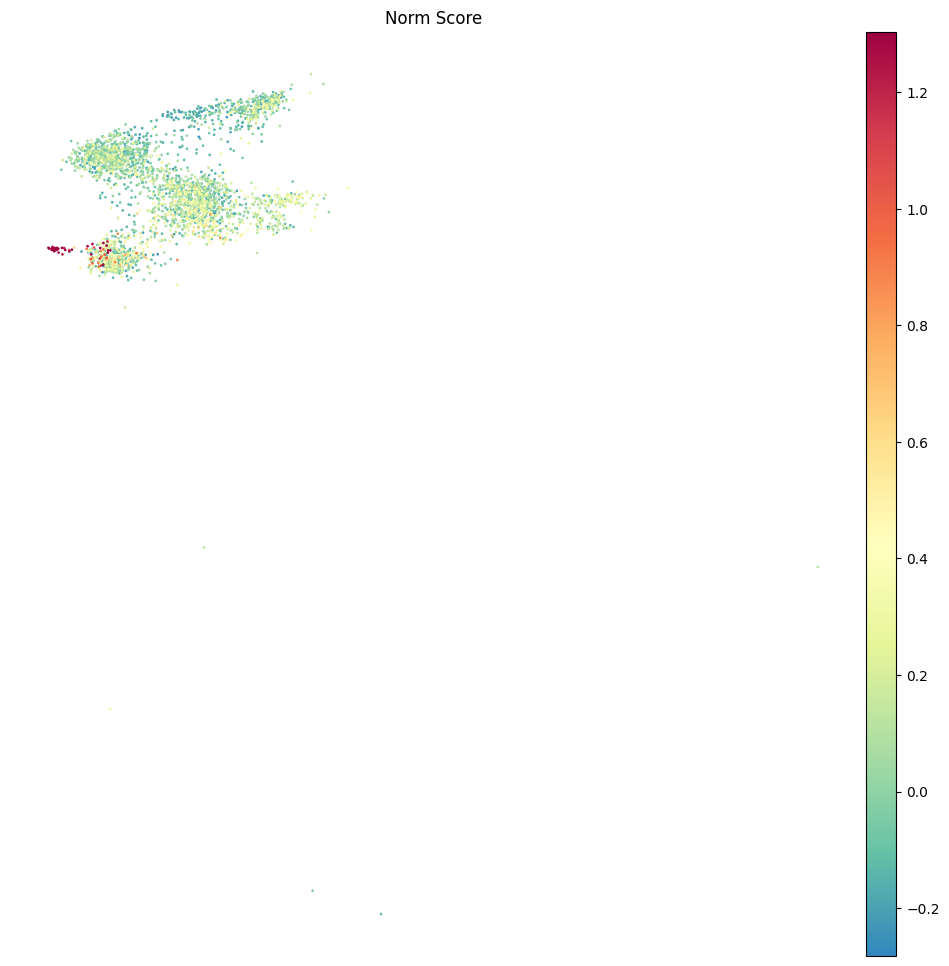

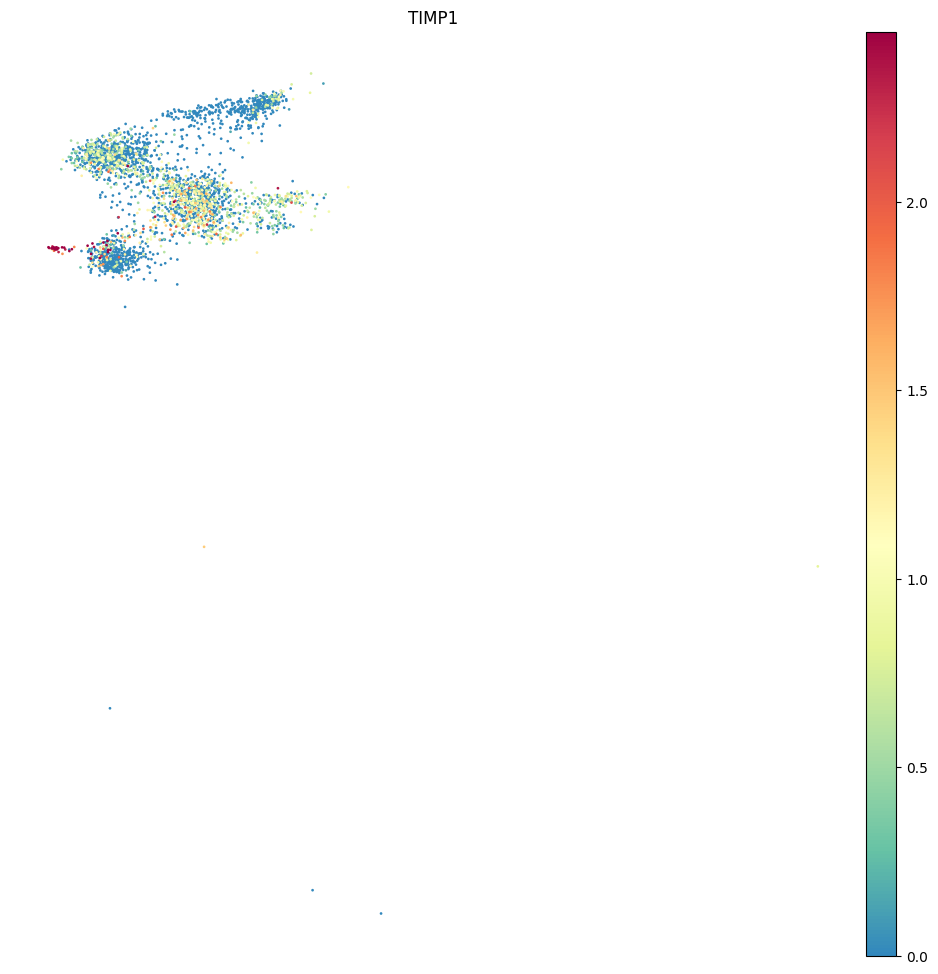

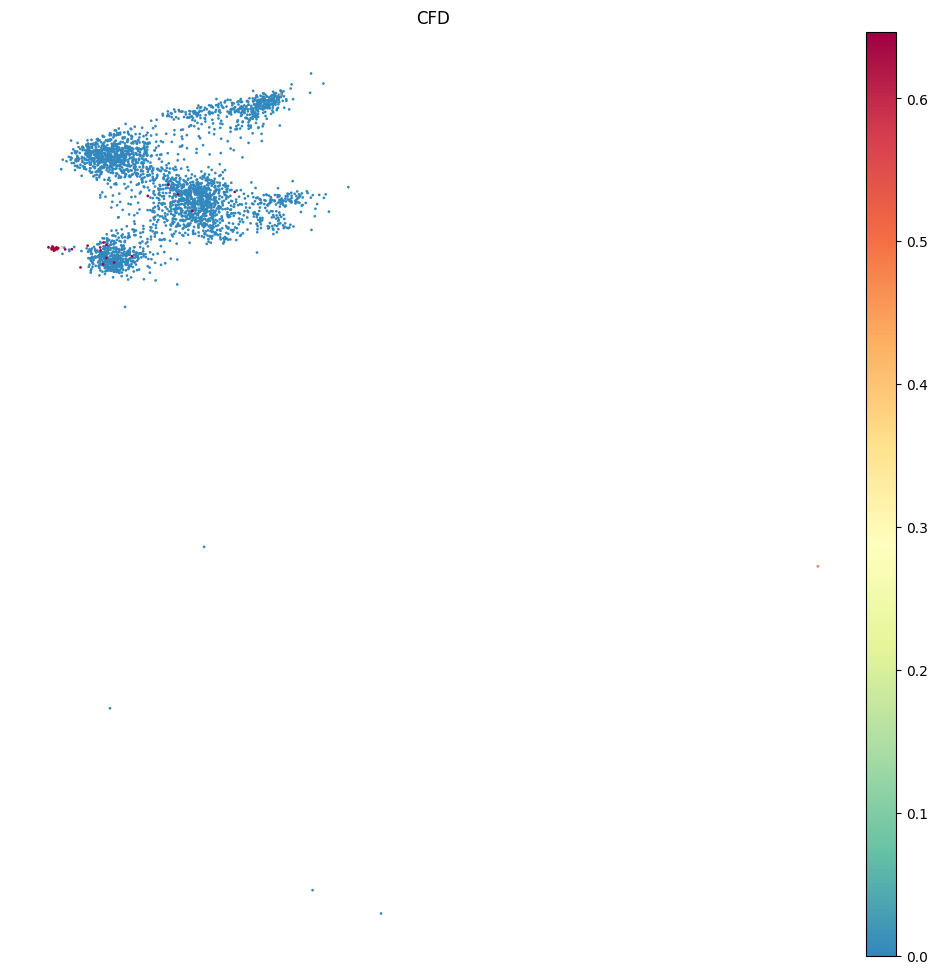

In [34]:
from matplotlib.colors import LinearSegmentedColormap

# Define the list of colors
colors = ["#9E0142", "#D53E4F", "#F46D43", "#FDAE61", "#FEE08B", 
          "#FFFFBF", "#E6F598", "#ABDDA4", "#66C2A5", "#3288BD"][::-1]#, "#5E4FA2"]

# Create a ListedColormap
smooth_cmap = LinearSegmentedColormap.from_list("smooth_cmap", colors)
for gene in ['DCN','PDGFRA','Norm Score','TIMP1','CFD']:
        sc.pl.embedding(adata, basis='Umap_scVI', color = gene, frameon=False, size = 15, show=False, vmax='p99', cmap=smooth_cmap)
        plt.savefig(f'figures/NORN/{gene}_umap.png', dpi=300, bbox_inches='tight')

# CHECKING FOR NORN CELLS

In [206]:
adata = adata[adata.obs['Deepscore_HCA_l1_Clean'].isin(['FIB','VSM/P'])].copy()

sc.pp.neighbors(adata, use_rep='scVI', n_neighbors=10)
sc.tl.umap(adata, spread = 1.5, min_dist = 0.2)


In [209]:
adata.raw=None

In [210]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

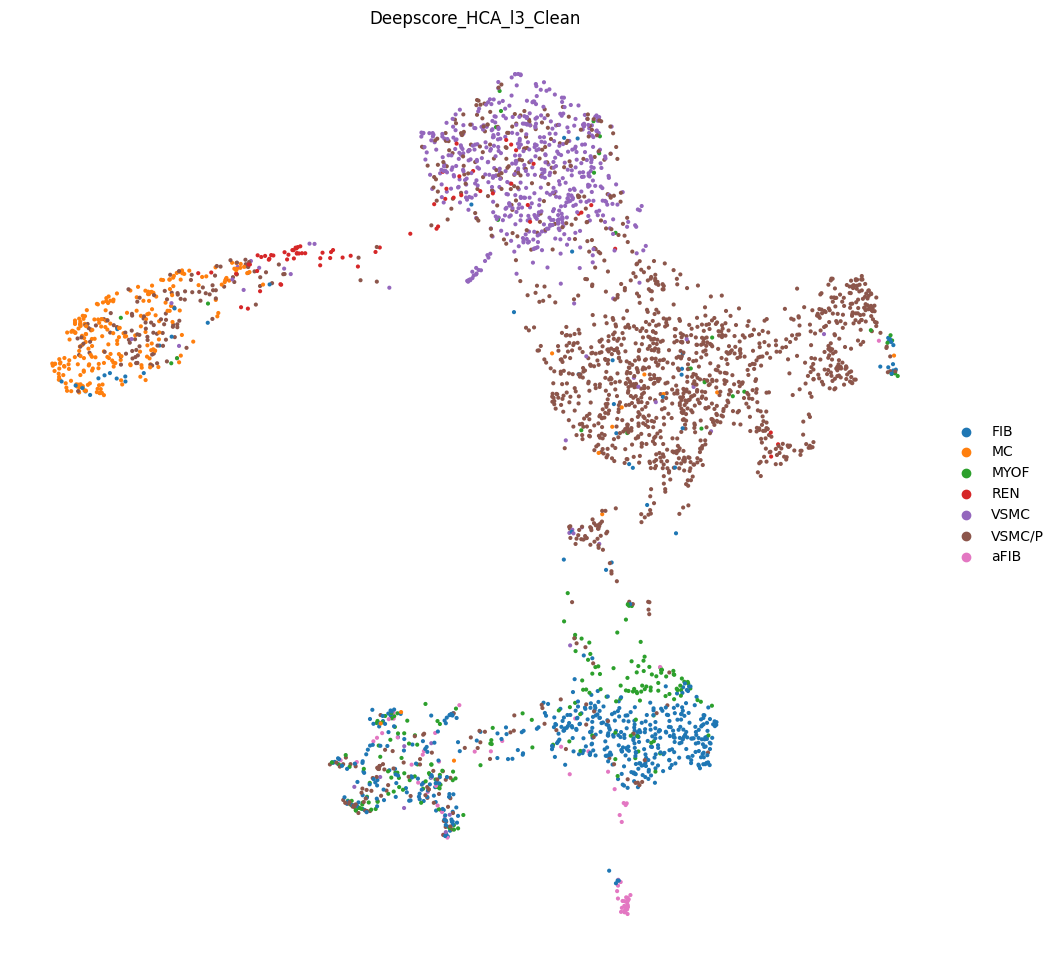

In [6]:
del adata.uns['Deepscore_HCA_l3_Clean_colors']
sc.pl.umap(adata, color = ['Deepscore_HCA_l3_Clean'], ncols=1, show=False, frameon=False)
plt.savefig('figures/NORN/fibros_reclustered.png', dpi=600, bbox_inches='tight')

In [10]:
adata.obs['batch'] = adata.obs['batch'].cat.rename_categories(['scRNA3p', 'scRNA5p', 'snRNA'])

/tmp/ipykernel_13682/3739593546.py:11: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(
/tmp/ipykernel_13682/3739593546.py:11: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=0.2`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.violinplot(


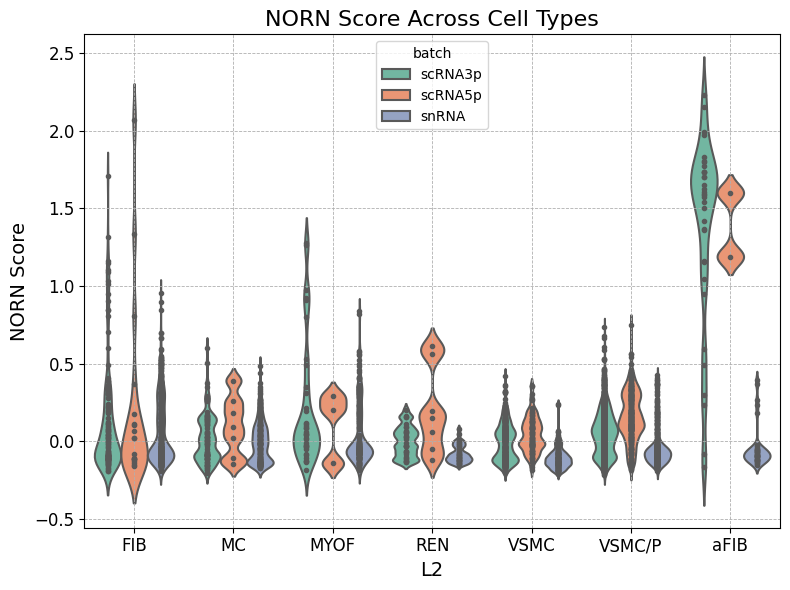

In [12]:
import pandas as pd
import numpy as np
data = pd.DataFrame({
    'cell_type': adata.obs['Deepscore_HCA_l3_Clean'],
    'NORN_score': adata.obs['NORN_scRNA_MARKERS_Sign_Score'],
    'batch': adata.obs['batch']
})

# Create the violin plot
plt.figure(figsize=(8, 6))  # Adjust figure size for clarity
sns.violinplot(
    x='cell_type',            # The categorical variable
    y='NORN_score',           # The numeric variable
    data=data,                # Your dataframe
    inner='point',         # Show quartiles within the violin
    scale='width',            # Equal width for violins regardless of sample size
    bw=0.2,                   # Smoothing parameter for the width of the violins
    linewidth=1.5,            # Thickness of the violin border
    palette="Set2",
    hue='batch')

# Enhance the aesthetics further
plt.title("NORN Score Across Cell Types", fontsize=16)  # Set titl
plt.xlabel("L2", fontsize=14)                                        # X-axis label
plt.ylabel("NORN Score", fontsize=14)                                       # Y-axis label
plt.xticks(fontsize=12)                                                     # X-axis tick size
plt.yticks(fontsize=12)                                                     # Y-axis tick size
plt.grid(True, which='major', linestyle='--', linewidth=0.6)                # Light grid for clarity
plt.tight_layout()                                                          # Adjust layout to prevent clipping
plt.savefig('figures/NORN/score_ct_by_batch_STWG.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()